<H3>PRI 2023/24: second
    project delivery</H3>

**GROUP 11**
- Francisco Martins, 99068
- Tunahan Güneş, 108108
- Sebastian Weidinger, 111612

In [1]:
from transformers import DistilBertTokenizer, DistilBertModel
from G11_code.data_collection import *
from G11_code.helper_functions import *
from G11_code.indexing import *
from G11_code.evaluation import *
from G11_code.clustering import *

/home/mono/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
article_path = os.path.join("..", "BBC News Summary", "BBC News Summary", "News Articles")
summary_path = os.path.join("..", "BBC News Summary", "BBC News Summary", "Summaries")
print("Article path:", article_path)
print("Summary path:", summary_path)
_article_file_paths_by_cat, _articles_by_cat, _summary_file_paths_by_cat, _summaries_by_cat, category_names= read_files(article_path, summary_path)

Article path: ../BBC News Summary/BBC News Summary/News Articles
Summary path: ../BBC News Summary/BBC News Summary/Summaries
Number of Categories: 5
Number of Articles in 'tech' Category: 401
Number of Articles in 'entertainment' Category: 386
Number of Articles in 'sport' Category: 511
Number of Articles in 'business' Category: 510
Number of Articles in 'politics' Category: 417


In [3]:
summary_sentence_indices_by_cat, faulty_summary_ids = get_summary_sentence_indices(_articles_by_cat, _summaries_by_cat)

number of found summaries: 2220
number of summaries: 2225
99.78%


In [4]:
articles_by_cat = remove_entries(_articles_by_cat, faulty_summary_ids)
articles = flatten(articles_by_cat)
article_file_paths_by_cat = remove_entries(_article_file_paths_by_cat, faulty_summary_ids)
article_file_paths = flatten(article_file_paths_by_cat)
summaries_by_cat = remove_entries(_summaries_by_cat, faulty_summary_ids)
summaries = flatten(summaries_by_cat)
summary_file_paths_by_cat = remove_entries(_summary_file_paths_by_cat, faulty_summary_ids)
summary_file_paths = flatten(summary_file_paths_by_cat)

In [5]:
path_to_articleID = lambda path: map_path_to_articleID(path, article_file_paths)

In [6]:
I = indexing(articles)

In [7]:
d=0
dissimilarity_matrix_tfidf = tf_idf_compute_dissimilarity_matrix(d, I)

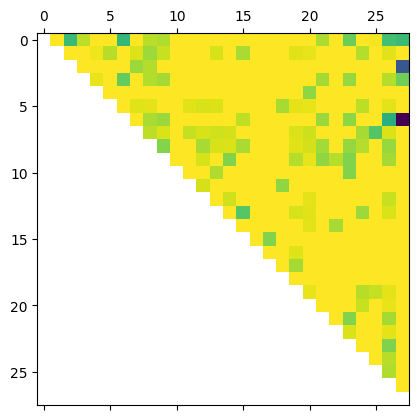

In [8]:
plt.matshow(dissimilarity_matrix_tfidf)

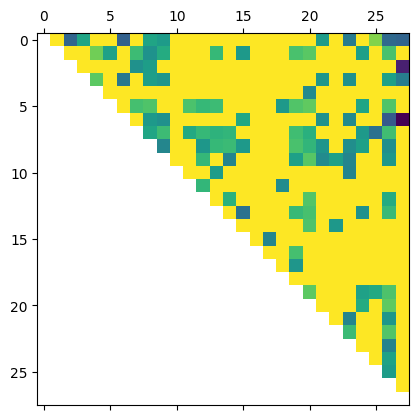

In [9]:
# If using another function to map the similarity matrix into a dissimilarity matrix such as d_ij = (1-s_ij^0.5)^2
plt.matshow((1-np.power(1 - dissimilarity_matrix_tfidf, 1/2))**2)

In [10]:
pretrained_weights = 'distilbert-base-uncased'
bert_tokenizer = DistilBertTokenizer.from_pretrained(pretrained_weights, do_lower_case=True)
bert_model = DistilBertModel.from_pretrained(pretrained_weights)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [11]:
dissimilarity_matrix_bert = bert_compute_dissimilarity_matrix(0, articles, bert_tokenizer, bert_model, device)

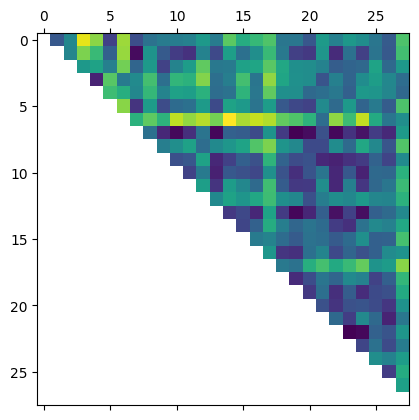

In [12]:
plt.matshow(dissimilarity_matrix_bert)

In [13]:
# print two closest sentences according to bert
for d in (0, 10, 600, 610, 900, 910):
    dissimilarity_matrix_bert = bert_compute_dissimilarity_matrix(d, articles, bert_tokenizer, bert_model, device)
    index_closest_bert = np.argmin(dissimilarity_matrix_bert)
    tokenized_article = nltk.sent_tokenize(articles[d])
    num_sent = len(tokenized_article)
    sent1 = index_closest_bert//num_sent
    sent2 = index_closest_bert%num_sent
    print(tokenized_article[sent1])
    print(tokenized_article[sent2])
    print(dissimilarity_matrix_bert[sent1, sent2])
    print('---')

The notion is of course to add a novel dark edge to a 007 game, but the premise simply does not get the juices flowing like it needs to.
It is perhaps indicative of a lack of confidence that the game maker's allow you several different weapons almost immediately and throw you quickly into raging firefights - no time is risked with a measured build-up.
0.031107724
---
But that's not the case.
But I have a tool.
0.01321584
---
She helped launch the Ballet Club at the Mercury Theatre (later the Ballet Rambert), the Vic Wells Ballet, and then, with Anton Dolin, the Markova-Dolin Ballet of 1935-37.
In 1950, back in England, she and Anton Dolin jointly established the Festival Ballet.
0.030496776
---
Star Trek fans have taken out a full-page ad in the Los Angeles Times in an attempt to persuade TV executives not to scrap Star Trek: Enterprise.
But fans around the world have pitched in to pay for the advert, which had the headline "Save Star Trek".
0.03232193
---
"I thought tonight was anothe

In [14]:
# print two closest sentences according to tfidf
for d in (0, 10, 600, 610, 900, 910):
    dissimilarity_matrix_tfidf = tf_idf_compute_dissimilarity_matrix(d, I)
    index_closest_tfidf = np.argmin(dissimilarity_matrix_tfidf)
    tokenized_article = nltk.sent_tokenize(articles[d])
    num_sent = len(tokenized_article)
    sent1 = index_closest_tfidf//num_sent
    sent2 = index_closest_tfidf%num_sent
    print(tokenized_article[sent1])
    print(tokenized_article[sent2])
    print(dissimilarity_matrix_tfidf[sent1, sent2])
    print('---')

Rogue Agent signals its intentions by featuring James Bond initially and proceeding to kill him off within moments, squashed by a plummeting helicopter.
GoldenEye: Rogue Agent is out now
0.6137347043784345
---
Two-thirds of the world's population, 4 billion people, live on $2,000 a year or less.
Why?
nan
---
She helped launch the Ballet Club at the Mercury Theatre (later the Ballet Rambert), the Vic Wells Ballet, and then, with Anton Dolin, the Markova-Dolin Ballet of 1935-37.
In 1950, back in England, she and Anton Dolin jointly established the Festival Ballet.
0.587751843064052
---
But fans around the world have pitched in to pay for the advert, which had the headline "Save Star Trek".
The advert described the Star Trek franchise as a "cultural icon".
0.6406007313001185
---
"It's taken a lot of work and a lot of fighting in my mind," he revealed.
I'll keep fighting and work a lot and I'll be up there."
0.37954527654735404
---
Manchester City's Paul Bosvelt will find out "within a mon

/home/mono/Projects/PRI/PRI2024/P2/G11_code/helper_functions.py:45: RuntimeWarning: invalid value encountered in divide
  return similarity_matrix / normalization


In [28]:
# save sentence and document embeddings 
pretrained_weights = 'distilbert-base-uncased'
bert_tokenizer = DistilBertTokenizer.from_pretrained(pretrained_weights, do_lower_case=True)
bert_model = DistilBertModel.from_pretrained(pretrained_weights)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)
path = './embeddings'
if not os.listdir(path): 
    save_embeddings(articles, bert_tokenizer, bert_model, device, path)
else: 
    print(f'Files exist in folder {path}')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Files exist in folder ./embeddings


In [29]:
# load embeddings 
sentence_embeddings_path = os.path.join('./embeddings', 'sentence_embeddings.pkl')
sentence_embeddings = load_embeddings(sentence_embeddings_path)
document_embeddings_path = os.path.join('./embeddings', 'document_embeddings.pkl')
document_embeddings = load_embeddings(document_embeddings_path)

<H2>Main facilities</H2>

<h3>Part I: clustering</h3>

*A) Clustering*

In [17]:
#code, statistics and/or charts here

*B) Summarization*

In [18]:
#code, statistics and/or charts here

*C) Keyword extraction*

In [19]:
#code, statistics and/or charts here

*D) Evaluation*

In [20]:
#code, statistics and/or charts here

<h3>Part II: classification</h3>

*A) Feature extraction*

In [21]:
#code and statistics here

*B) Classification*

In [22]:
#code here

*C) Ranking extension*

In [23]:
#code here

*D) Evaluation*

In [24]:
#code, statistics and/or charts here

<H2>Question materials (optional)</H2>

<H3>Part I: clustering</H3>

**(1)** Do clustering-guided summarization alters the behavior and efficacy of the IR system?

In [25]:
#code, statistics and/or charts here

**(2)** How sentence representations, clustering choices, and rank criteria impact summarization?

In [26]:
#code, statistics and/or charts here

**...** (additional questions with empirical results)

<H3>END</H3>